In [205]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
df = pd.read_csv('opportunities.csv',low_memory=False)
#df.info()

In [206]:
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')
df["Last_Modified_Date"].head(2)

0   2016-06-13
1   2016-01-15
Name: Last_Modified_Date, dtype: datetime64[ns]

In [207]:
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')
df["Opportunity_Created_Date"].head(2)

0   2015-12-07
1   2015-12-07
Name: Opportunity_Created_Date, dtype: datetime64[ns]

In [208]:
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days
df["diferencia_en_dias"].head(2)

0    189
1     39
Name: diferencia_en_dias, dtype: int64

In [209]:
df_agrupado_x_oportunidad = df.groupby(["Opportunity_ID"]).agg({"Stage":'first', "diferencia_en_dias":"first", "ID":"first"}).reset_index()
#df_agrupado_x_oportunidad[df_agrupado_x_oportunidad["Opportunity_ID"] == 2008]

In [210]:
df_cant_oportunidades_por_cant_dias = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
df_cant_oportunidades_por_cant_dias

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
0,Closed Lost,0,21
1,Closed Lost,1,8
2,Closed Lost,2,17
3,Closed Lost,3,10
4,Closed Lost,4,6
...,...,...,...
1094,Closed Won,951,1
1095,Closed Won,956,1
1096,Closed Won,998,1
1097,Closed Won,1037,1


In [213]:
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
#df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias_Won[df_cant_oportunidades_por_cant_dias_Won["duracion_oportunidad_en_dias"] > 1]
#df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias_Lost[df_cant_oportunidades_por_cant_dias_Lost["duracion_oportunidad_en_dias"] > 1]
df_cant_oportunidades_por_cant_dias_Won.head(10)

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
610,Closed Won,0,359
611,Closed Won,1,238
612,Closed Won,2,82
613,Closed Won,3,73
614,Closed Won,4,43
615,Closed Won,5,44
616,Closed Won,6,35
617,Closed Won,7,23
618,Closed Won,8,25
619,Closed Won,9,19


Text(0, 0.5, 'Cantidad de oportunidades por duracion de la oportunidad')

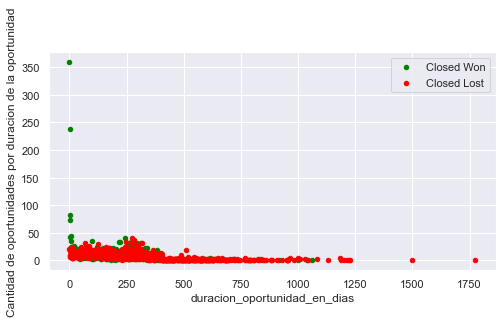

In [214]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost', ax=ax)
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

In [218]:
df_cant_oportunidades_lost_vs_won = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["diferencia_en_dias", "Stage"]).agg({'ID':'count'}).unstack()#.reset_index()
df_cant_oportunidades_lost_vs_won.columns = ["cantidad_oportunidades_Lost", "cantidad_oportunidades_Won"]
df_cant_oportunidades_lost_vs_won

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,21.0,359.0
1,8.0,238.0
2,17.0,82.0
3,10.0,73.0
4,6.0,43.0
...,...,...
1214,1.0,NaN
1222,1.0,NaN
1226,1.0,NaN


In [292]:
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won.divide(df_cant_oportunidades_lost_vs_won.sum(axis=1), axis=0)
df_cant_oportunidades_lost_vs_won_perc

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,0.055263,0.944737
1,0.032520,0.967480
2,0.171717,0.828283
3,0.120482,0.879518
4,0.122449,0.877551
...,...,...
1214,1.000000,NaN
1222,1.000000,NaN
1226,1.000000,NaN


In [241]:
#df_cant_oportunidades_lost_vs_won_perc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 1775
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cantidad_oportunidades_Lost  610 non-null    float64
 1   cantidad_oportunidades_Won   489 non-null    float64
dtypes: float64(2)
memory usage: 15.4 KB


In [243]:
#bla = df_cant_oportunidades_lost_vs_won_perc.dropna()
#len(bla.index)

442

In [293]:
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 400) & (df_cant_oportunidades_lost_vs_won_perc.index < 450)]
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.fillna(0)
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.loc[(df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"] + df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"]) > 0,:]
#df_cant_oportunidades_lost_vs_won_perc.info()
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.dropna()
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 300) & (df_cant_oportunidades_lost_vs_won_perc.index < 550)]

In [295]:
df_cant_oportunidades_lost_vs_won_perc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 998
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cantidad_oportunidades_Lost  442 non-null    float64
 1   cantidad_oportunidades_Won   442 non-null    float64
dtypes: float64(2)
memory usage: 10.4 KB


In [250]:
rows = len(df_cant_oportunidades_lost_vs_won_perc.index + 1)
rows

442

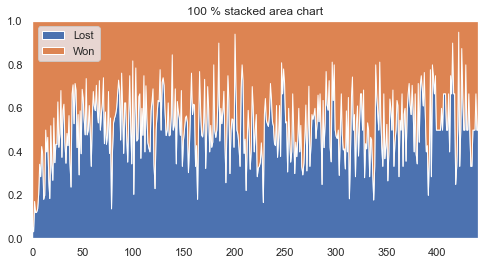

In [296]:
rows = len(df_cant_oportunidades_lost_vs_won_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"],  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

In [237]:
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
data 

,group_A,group_B,group_C
1,1,2,2
2,4,24,8
3,6,7,5
4,8,10,10
5,9,12,6


In [238]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
data_perc



,group_A,group_B,group_C
1,0.200000,0.400000,0.400000
2,0.111111,0.666667,0.222222
3,0.333333,0.388889,0.277778
4,0.285714,0.357143,0.357143
5,0.333333,0.444444,0.222222


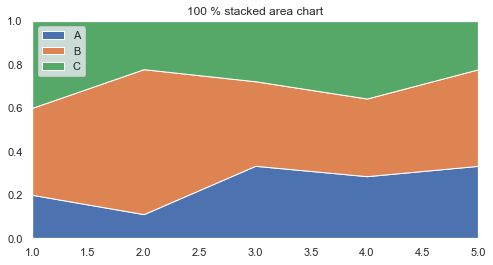

In [239]:
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

In [66]:
#df["Actual_Delivery_Date"].tail(20)
#df["Opportunity_Created_Date"].head(20)
#df[df["ID"] == 12703][["ID","Planned_Delivery_Start_Date"]].tail(20)
#df[df["Actual_Delivery_Date"] != 'NaT'][["ID","Actual_Delivery_Date"]].tail(20)
df["Fecha"] = df["Actual_Delivery_Date"].isnull()
df["Last_Modified_Date"].value_counts()

2/8/2018      5821
12/4/2016     2673
9/6/2018       257
9/26/2018      206
6/9/2018       187
              ... 
1/16/2018        1
9/15/2017        1
3/6/2017         1
2/12/2016        1
11/24/2018       1
Name: Last_Modified_Date, Length: 650, dtype: int64

In [94]:
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')
df["Last_Modified_Date"].head(10)
#df[df["Fecha"] != 'NaT'][["ID","Actual_Delivery_Date"]].tail(20)

0   2016-06-13
1   2016-01-15
2   2016-09-29
3   2018-03-27
4   2018-03-27
5   2018-03-27
6   2016-10-07
7   2015-12-09
8   2016-04-05
9   2016-04-05
Name: Last_Modified_Date, dtype: datetime64[ns]

In [95]:
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')
df["Opportunity_Created_Date"].head(12)

0    2015-12-07
1    2015-12-07
2    2015-12-08
3    2015-12-08
4    2015-12-08
5    2015-12-08
6    2015-12-08
7    2015-12-09
8    2015-12-09
9    2015-12-09
10   2015-12-09
11   2015-12-09
Name: Opportunity_Created_Date, dtype: datetime64[ns]

In [110]:
#df_fechas = df[df["ID"] == 27761][["Opportunity_Created_Date", "Last_Modified_Date"]]
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days
df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg( \
                    [('diferencia_en_dias','count')]) #, 'Stage': (lambda x: np.count // 10)})

df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'diferencia_en_dias':'count'})

#.agg(    [('one',  np.mean),     ('two', lambda value: 100* ((value>32).sum() / reading.mean())),     ('test2', lambda value: 100* ((value > 45).sum() / value.mean()))])

ID             Region  \
                               diferencia_en_dias diferencia_en_dias   
Stage       diferencia_en_dias                                         
Closed Lost 0                                  25                 25   
            1                                  12                 12   
            2                                  27                 27   
            3                                  10                 10   
            4                                   6                  6   
...                                           ...                ...   
Closed Won  951                                 1                  1   
            956                                 1                  1   
            998                                 1                  1   
            1037                                1                  1   
            1059                                1                  1   

                                        Territory  \
                               diferencia_en_dias   
Stage       diferencia_en_dias                      
Closed Lost 0                                  25   
            1                                  12   
            2                                  27   
            3                                  10   
            4                                   6   
...                                           ...   
Closed Won  951                                 1   
            956                                 1   
            998                                 1   
            1037                                1   
            1059                                1   

                               Pricing, Delivery_Terms_Quote_Appr  \
                                               diferencia_en_dias   
Stage       diferencia_en_dias                                      
Closed Lost 0                                                  25   
            1                                                  12   
            2                                                  27   
            3                                                  10   
            4                                                   6   
...                                                           ...   
Closed Won  951                                                 1   
            956                                                 1   
            998                                                 1   
            1037                                                1   
            1059                                                1   

                               Pricing, Delivery_Terms_Approved  \
                                             diferencia_en_dias   
Stage       diferencia_en_dias                                    
Closed Lost 0                                                25   
            1                                                12   
            2                                                27   
            3                                                10   
            4                                                 6   
...                                                         ...   
Closed Won  951                                               1   
            956                                               1   
            998                                               1   
            1037                                              1   
            1059                                              1   

                               Bureaucratic_Code_0_Approval  \
                                         diferencia_en_dias   
Stage       diferencia_en_dias                                
Closed Lost 0                                            25   
            1                                            12   
            2                                            27   
           

In [139]:
df_cant_oportunidades_por_cant_dias = df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
df_cant_oportunidades_por_cant_dias

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
0,Closed Lost,0,25
1,Closed Lost,1,12
2,Closed Lost,2,27
3,Closed Lost,3,10
4,Closed Lost,4,6
...,...,...,...
1094,Closed Won,951,1
1095,Closed Won,956,1
1096,Closed Won,998,1
1097,Closed Won,1037,1


In [144]:
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
df_cant_oportunidades_por_cant_dias_Won.head(10)

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
610,Closed Won,0,532
611,Closed Won,1,428
612,Closed Won,2,138
613,Closed Won,3,115
614,Closed Won,4,89
615,Closed Won,5,106
616,Closed Won,6,49
617,Closed Won,7,53
618,Closed Won,8,36
619,Closed Won,9,29


Text(0, 0.5, 'Cantidad de oportunidades por duracion de la oportunidad')

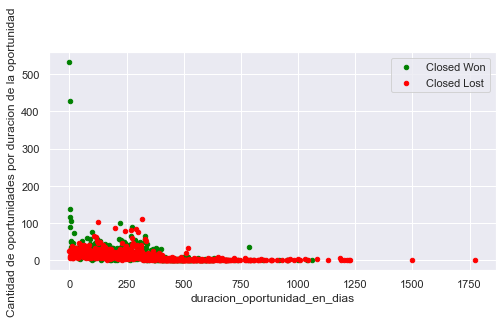

In [143]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost', ax=ax)
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

In [309]:
df_cant_oportunidades_por_cant_dias["periodo"] = (((df_cant_oportunidades_por_cant_dias["duracion_oportunidad_en_dias"] // 10) + 1) * 10)
#df_cant_oportunidades_por_cant_dias.head(30)
df_won_vs_lost_cada_10_dias = df_cant_oportunidades_por_cant_dias.groupby(["periodo", "Stage"]).agg({'cantidad_oportunidades': 'sum'}).unstack()
df_won_vs_lost_cada_10_dias

cantidad_oportunidades           
Stage              Closed Lost Closed Won
periodo                                  
10                       114.0      941.0
20                       103.0      179.0
30                       130.0      156.0
40                       115.0      129.0
50                       112.0       89.0
...                        ...        ...
1210                       1.0        NaN
1220                       1.0        NaN
1230                       2.0        NaN
1500                       1.0        NaN
1780                       1.0        NaN

[104 rows x 2 columns]

In [310]:
df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.fillna(0)
#df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.dropna()

In [311]:
df_won_vs_lost_cada_10_dias_perc = df_won_vs_lost_cada_10_dias.divide(df_won_vs_lost_cada_10_dias.sum(axis=1), axis=0)
df_won_vs_lost_cada_10_dias_perc.columns = ["Lost","Won"]
df_won_vs_lost_cada_10_dias_perc

,Lost,Won
periodo,,
10,0.108057,0.891943
20,0.365248,0.634752
30,0.454545,0.545455
40,0.471311,0.528689
50,0.557214,0.442786
...,...,...
1210,1.000000,0.000000
1220,1.000000,0.000000
1230,1.000000,0.000000


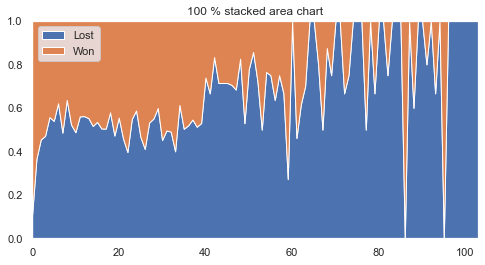

In [312]:
rows = len(df_won_vs_lost_cada_10_dias_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_won_vs_lost_cada_10_dias_perc["Lost"],  df_won_vs_lost_cada_10_dias_perc["Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Won VS Lost segun duracion de la oportunidad')
plt.show()

In [ ]:
df_cant_oportunidades_por_cant_dias


df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg( \
                                                    {'diferencia_en_dias':'count'
                                                     ,'Stage': lambda x: ((x.count() // 10) + 1)*10
                                                    })

In [158]:
df.groupby(["Opportunity_ID"]).agg({"ID":'min', "Stage":'count'}).nlargest(10,"Stage")

,ID,Stage
Opportunity_ID,,
2008,7710,36
12460,20112,36
5123,15039,26
6606,20524,26
2911,27881,24
767,14464,18
4568,9553,16
6652,21991,16
6653,21864,16


In [163]:
df[df["Opportunity_ID"] == 2008][["ID", "Opportunity_ID", "Opportunity_Created_Date", "Last_Modified_Date", "Stage"]]

,ID,Opportunity_ID,Opportunity_Created_Date,Last_Modified_Date,Stage
3586,7710,2008,2016-07-11,2018-09-06,Closed Won
3587,7715,2008,2016-07-11,2018-09-06,Closed Won
3588,7722,2008,2016-07-11,2018-09-06,Closed Won
3589,7727,2008,2016-07-11,2018-09-06,Closed Won
3590,7733,2008,2016-07-11,2018-09-06,Closed Won
3591,7738,2008,2016-07-11,2018-09-06,Closed Won
3592,7744,2008,2016-07-11,2018-09-06,Closed Won
3593,7749,2008,2016-07-11,2018-09-06,Closed Won
3594,7755,2008,2016-07-11,2018-09-06,Closed Won
3595,7760,2008,2016-07-11,2018-09-06,Closed Won


In [180]:
a = df[df["Last_Modified_Date"] == df["Opportunity_Created_Date"]][["ID", "Last_Modified_Date", "Opportunity_Created_Date","Stage"]]
a.groupby(["Stage"]).agg({"ID":"count"})

,ID
Stage,
Closed Lost,25
Closed Won,532
Proposal,10
Qualification,11


In [91]:
df_fechas = df[df["ID"] == 27761][["Opportunity_Created_Date", "Last_Modified_Date"]]
df_fechas["diferencia"] = (df_fechas["Last_Modified_Date"] - df_fechas["Opportunity_Created_Date"]).dt.days
df_fechas["mod"] = df_fechas["diferencia"] // 10
df_fechas

,Opportunity_Created_Date,Last_Modified_Date,diferencia,mod
0,2015-12-07,2016-06-13,189,18


In [ ]:
ax = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Won',color='Green', \
                               label='Closed Won')

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Lost',
         color='Red', label='Closed Lost', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Negotiation',
         color='Yellow', label='Negotiation', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Proposal',
         color='Cyan', label='Proposal', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Qualification',
         color='Orange', label='Qualification', ax=ax)

graf.set_ylabel('Cantidad de oportunidades')
graf.set_xlabel('Cantidad de items')

In [ ]:
ax = ([ 1, 2, 3, 2, 2, 1, 1, 1, 1, 1])

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Lost',
         color='Red', label='Closed Lost', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Negotiation',
         color='Yellow', label='Negotiation', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Proposal',
         color='Cyan', label='Proposal', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Qualification',
         color='Orange', label='Qualification', ax=ax)

graf.set_ylabel('Cantidad de oportunidades')
graf.set_xlabel('Cantidad de items')

In [28]:
df['Account_Owner'].value_counts()

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     326
Person_Name_42     304
Person_Name_66     258
Person_Name_60     227
Person_Name_59     201
Person_Name_49     201
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_21     166
Person_Name_5      166
Person_Name_63     138
Person_Name_55     138
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      72
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      15
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_25       7
Person_Name_36       7
Person_Name_23       4
Person_Name_34       3
Person_Name

In [29]:
df['Brand'].value_counts()

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_7        17
Brand_21       17
Brand_13       17
Brand_20       10
Brand_23       10
Brand_17        5
Brand_27        5
Brand_4         4
Brand_0         4
Brand_2         4
Brand_12        3
Brand_16        2
Brand_19        1
Brand_1         1
Brand_26        1
Brand_6         1
Brand_3         1
Name: Brand, dtype: int64

In [30]:
df['Product_Type'].value_counts()

None              15935
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64

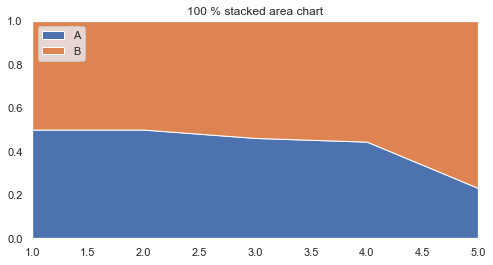

In [38]:

# Make data
data = pd.DataFrame({  'group_A':[1,3,6,8,9], 'group_B':[1,3,7,10,30], }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],   labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


PRUEBAS

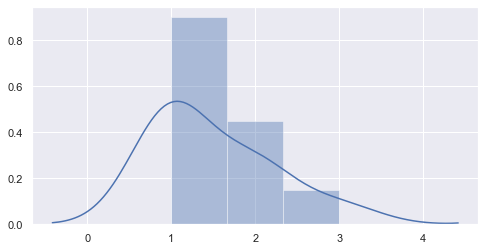

In [24]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(20)
y = ([ 1, 2, 3, 2, 2, 1, 1, 1, 1, 1])
ax = sns.distplot(y)
plt.show()